In [38]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

def img_show(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure("Image") # 图像窗口名称
    plt.imshow(img_rgb)
    plt.axis('off') # 关掉坐标轴为 off
    plt.show()

color_dist = {'red': {'Lower': np.array([0, 60, 60]), 'Upper': np.array([6, 255, 255])},
              'gray': {'Lower': np.array([0, 0, 46]), 'Upper': np.array([180, 43, 220])},
              'yellow': {'Lower': np.array([26, 43, 46]), 'Upper': np.array([34, 255, 255])},          
              'blue': {'Lower': np.array([100, 80, 46]), 'Upper': np.array([124, 255, 255])},
              'green': {'Lower': np.array([35, 43, 46]), 'Upper': np.array([77, 255, 255])},
              'none': {'Lower': np.array([0, 0, 0]), 'Upper': np.array([255, 255, 255])},}

# 摄像头内参
mtx = np.array([[1.35635605e+03, 0.00000000e+00, 6.46212314e+02],
       [0.00000000e+00, 1.35578874e+03, 3.78009469e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

dist = np.array([[-2.52464877e-01, 1.92828476e-01, -6.55508668e-04, 2.48903668e-03, -7.45335496e-01]])

In [39]:
img = cv2.imread("./obj/obj (1).jpg")

dst = cv2.undistort(img, mtx, dist, None, mtx)

hsv_img = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)

inRange_hsv = cv2.inRange(hsv_img,
                            color_dist["green"]["Lower"], 
                            color_dist["green"]["Upper"]
                            )

edges = cv2.Canny(inRange_hsv,50,150,apertureSize = 3)

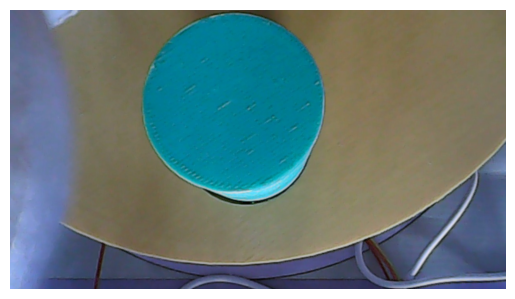

In [40]:
img_show(dst)

1385


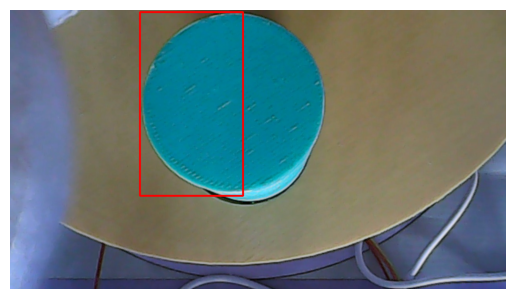

In [41]:
contours, hierarchy = cv2.findContours(inRange_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
obj_contour = []
for contour in contours:
    if len(contour) > len(obj_contour):
        obj_contour = contour
print(len(obj_contour))
# 1940 1586 1531 
x, y, w, h = cv2.boundingRect(obj_contour)
dst = cv2.rectangle(dst, (x,y),(x+w,y+h), (0,0,255), 3)
img_show(dst)
    
#pre_dst = cv2.drawContours(img, [obj_contour], 0, (0, 0, 255), 3)
#img_show(pre_dst)

# epsilon = 0.05 * cv2.arcLength(obj_contour, True)
# approx = cv2.approxPolyDP(obj_contour, epsilon, True)
# draw_img = dst.copy()
# res = cv2.drawContours(draw_img, [approx], -1, (0, 0, 255), 3)
# img_show(res)


# the_dst = dst[y:y+h,x:x+w]
# img_show(the_dst)

In [42]:
# # 将检测结果绘制在图像上
# for i in circle[0, :]:  # 遍历矩阵的每一行的数据
#     # 绘制圆形
#     cv2.circle(dst1, (int(i[0]), int(i[1])), int(i[2]), (255, 0, 0), 10)
#     # 绘制圆心
#     cv2.circle(dst1, (int(i[0]), int(i[1])), 10, (255, 0, 0), -1)

# img_show(dst1)

In [43]:
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ret,img_bin=cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
# img_dst = cv2.medianBlur(img_gray, 7)